# Advantage vs. Luck

With regards to probability, the Hafling Luck trait ([Halfing Traits](https://www.dndbeyond.com/races/14-halfling#HalflingTraits)) is the same as rolling with advantage ([Advantage and Disadvantage](https://www.dndbeyond.com/sources/basic-rules/using-ability-scores#AdvantageandDisadvantage)). Both are simulated below:

In [50]:
# Standard library
import random

# Third-party
import matplotlib.pyplot as plot
import matplotlib.ticker as ticker
import numpy

%matplotlib inline
plot.style.use("ggplot")
ROLLS = 1000000


def roll_d20(mod=0):
    return random.randint(1, 20) + mod


def roll_adv(mod, dc):
    roll1 = roll_d20(mod)
    roll2 = roll_d20(mod)
    roll = sorted([roll1, roll2])[-1]
    if roll >= dc:
        result = True
    else:
        result = False
    return result


def roll_luck(mod, dc):
    roll = roll_d20(mod)
    if roll >= dc:
        result = 1
    else:
        roll = roll_d20(mod)
        if roll >= dc:
            result = True
        else:
            result = False
    return result


def aggregate(results):
    data = {}
    for result in results:
        if result:
            key = "success"
        else:
            key = "failure"
        try:
            data[key] += 1
        except KeyError:
            data[key] = 1
    for key, count in data.items():
        data[key] = round((count / ROLLS) * 100, 2)
    success_percent = data["success"]
    return success_percent


def simulate_luck(mod, dc):
    results = []
    for _ in range(ROLLS):
        results.append(roll_luck(mod, dc))
    data = aggregate(results)
    return data


def simulate_adv(mod, dc):
    results = []
    for _ in range(ROLLS):
        results.append(roll_adv(mod, dc))
    data = aggregate(results)
    return data

In [51]:
advantage_roll = {}
for dc in range(1, 20):
    advantage_roll[dc] = simulate_adv(0, dc)
advantage_roll = numpy.array(list(advantage_roll.items())).transpose()

luck_roll = {}
for dc in range(1, 20):
    luck_roll[dc] = simulate_luck(0, dc)
luck_roll = numpy.array(list(luck_roll.items())).transpose()

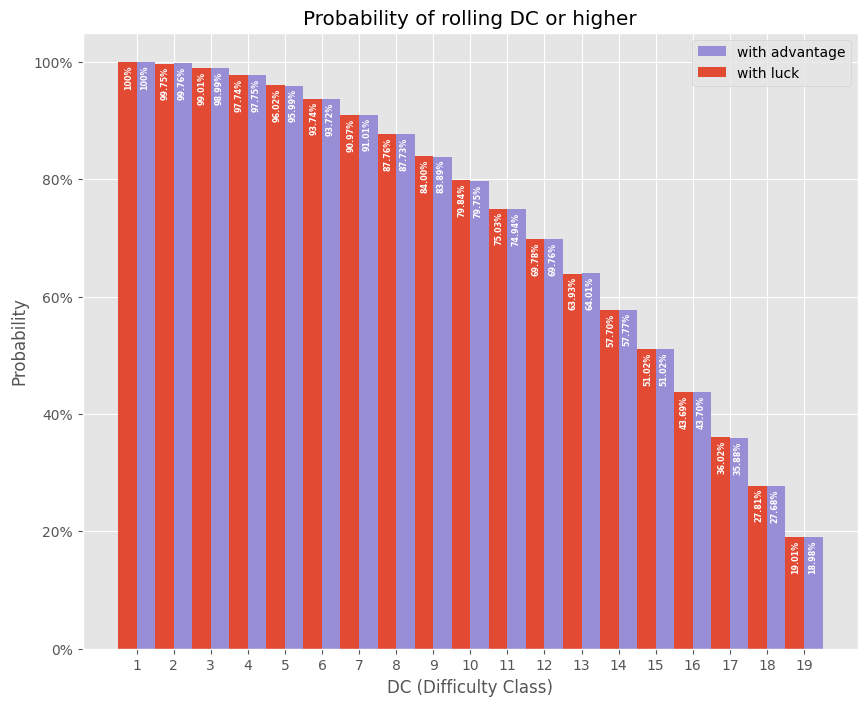

In [52]:
def annotate(ax, index, probability, align):
    """
    Annotate top of bar plot with exact probability percentage
    """
    if probability >= 100.0:
        text = f"{probability:0.0f}%"
    else:
        text = f"{probability:0.2f}%"
    ax.annotate(
        text,
        (index, probability - 0.5),
        color="white",
        fontsize="xx-small",
        fontweight="bold",
        horizontalalignment=align,
        rotation="vertical",
        verticalalignment="top",
        zorder=5,
    )


# Initialize plot
fig, ax = plot.subplots()
fig.set_size_inches(10, 8)

# Create bar plot and annotation for success probability with advantage
ax.bar(advantage_roll[0], advantage_roll[1], align="edge", color="C2", label="with advantage", width=0.5)
for i, probability in enumerate(advantage_roll[1]):
    x = i + 1
    annotate(ax, x + 0.1, probability, "left")
# Create bar plot and annotation for success probability with luck
ax.bar(luck_roll[0], luck_roll[1], align="edge", label="with luck", width=-0.5)
for i, probability in enumerate(luck_roll[1]):
    x = i + 1
    annotate(ax, x - 0.1, probability, "right")


# Configure Title
ax.set_title("Probability of rolling DC or higher")
# Confgure X Axis
ax.xaxis.set_major_locator(ticker.FixedLocator(advantage_roll[0]))
ax.set_xlabel("DC (Difficulty Class)")
# Configure Y Axis
ax.set_ylabel("Probability")
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
# Configure Legend
ax.legend()